In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

#### all my package version

In [2]:
! python --version
! conda list pandas
! conda list math
! conda list matplotlib
! conda list numpy 
! conda list scikit-learn

Python 3.6.8 :: Anaconda custom (64-bit)
# packages in environment at /Users/roccqqck/miniconda3/envs/stockenv:
#
# Name                    Version                   Build  Channel
pandas                    0.24.2           py36h0a44026_0  
pandas-datareader         0.7.0                    py36_0  
# packages in environment at /Users/roccqqck/miniconda3/envs/stockenv:
#
# Name                    Version                   Build  Channel
mpmath                    1.1.0                    py36_0  
# packages in environment at /Users/roccqqck/miniconda3/envs/stockenv:
#
# Name                    Version                   Build  Channel
matplotlib                3.0.2            py36h54f8f79_0  
# packages in environment at /Users/roccqqck/miniconda3/envs/stockenv:
#
# Name                    Version                   Build  Channel
numpy                     1.15.4           py36hacdab7b_0  
numpy-base                1.15.4           py36h6575580_0  
numpydoc                  0.8.0        

In [3]:
df = pd.read_csv("hw1_data.csv",encoding="utf-8")
df.head()

,X,Y
0,0.0,2.045
1,0.1,3.550
2,0.2,2.140
3,0.3,3.030
4,0.4,3.107


In [4]:
df['X']=df['X'].astype(float)   # dataframe全部轉float
df['Y']=df['Y'].astype(float)
#df.head()

In [5]:
df['lnY']= np.log(df['Y'])
df.head()

,X,Y,lnY
0,0.0,2.045,0.715398
1,0.1,3.550,1.266948
2,0.2,2.140,0.760806
3,0.3,3.030,1.108563
4,0.4,3.107,1.133658


In [6]:
x2 = df['X'].to_numpy()   # dataframe轉numpy
x2 = x2.astype(float)     # numpy全部轉float
x2[:5]

array([0. , 0.1, 0.2, 0.3, 0.4])

In [7]:
y2 = df['Y'].to_numpy()
y2 = y2.astype(float)
y2[:5]

array([2.045, 3.55 , 2.14 , 3.03 , 3.107])

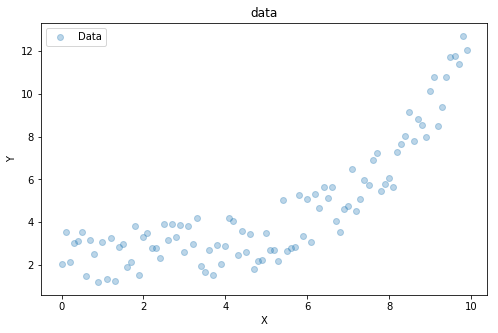

(<matplotlib.legend.Legend at 0x113d774e0>, None)

In [8]:
plt.figure(figsize = (8,5))
plt.scatter(x2,y2, alpha = .3, label = 'Data')
plt.title('data')
plt.xlabel('X'), plt.ylabel('Y')
plt.legend(), plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
X = df[['X']].to_numpy()
Y = df['lnY'].to_numpy()

model = LinearRegression()
model.fit(X,Y)                       
# model.fit( df[['X']] , df['Y'] )    sklearn 喂 dataframe 或 nparray都可

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
model.coef_     ### 斜率

array([0.15970215])

In [12]:
model.intercept_    ### 截距

0.5802426100264981

In [13]:
model.score(X,Y)

0.6701841660528389

In [14]:
x=0.1
model.predict([[x]])   #一個 x 丟進model =  x * 斜率 + 截距

array([0.59621283])

In [15]:
mean_squared_error(model.predict(X), Y)

0.10458615619587595

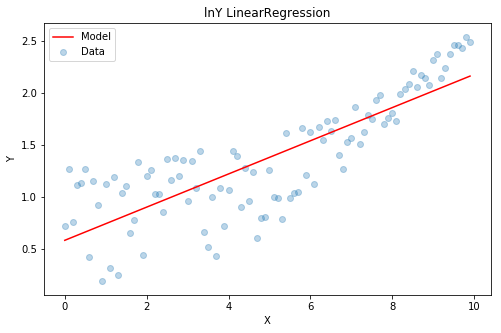

(<matplotlib.legend.Legend at 0x1a166f6be0>, None)

In [16]:
x2 = df['X'].to_numpy()
y2 = df['lnY'].to_numpy()
plotY = model.predict(X)
plt.figure(figsize = (8,5))
plt.scatter(x2,y2, alpha = .3, label = 'Data')
plt.plot(x2,plotY, color = 'red', label = 'Model')
plt.title('lnY LinearRegression')
plt.xlabel('X'), plt.ylabel('Y')
plt.legend(), plt.show()

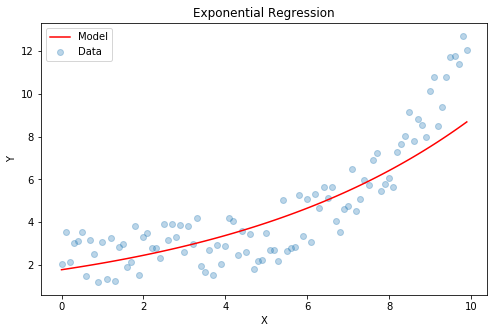

(<matplotlib.legend.Legend at 0x1a169b59e8>, None)

In [17]:
x2 = df['X'].to_numpy()
y2 = df['Y'].to_numpy()

plotY = math.e**( (model.coef_ * X) + model.intercept_ )
plt.figure(figsize = (8,5))
plt.scatter(x2,y2, alpha = .3, label = 'Data')
plt.plot(x2,plotY, color = 'red', label = 'Model')
plt.title('Exponential Regression')
plt.xlabel('X'), plt.ylabel('Y')
plt.legend(), plt.show()